# Xarray Davies Reef

In [1]:
import os
import numpy as np
import xarray as xr

import cartopy
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
cartopy.config['data_dir'] = os.getenv('CARTOPY_DIR', cartopy.config.get('data_dir'))

import cmocean

from matplotlib import pyplot as plt
#%config InlineBackend.figure_format = 'retina'
plt.ion()  # To trigger the interactive inline mode

import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning) 

In [2]:
year = 2018

# GBR4
base_url = "http://thredds.ereefs.aims.gov.au/thredds/dodsC/s3://aims-ereefs-public-prod/derived/ncaggregate/ereefs/GBR4_H2p0_B3p1_Cq3b_Dhnd/daily-monthly/EREEFS_AIMS-CSIRO_GBR4_H2p0_B3p1_Cq3b_Dhnd_bgc_daily-monthly-"

biofiles = [f"{base_url}{year}-{month:02}.nc" for month in range(1, 2)]
biofiles

['http://thredds.ereefs.aims.gov.au/thredds/dodsC/s3://aims-ereefs-public-prod/derived/ncaggregate/ereefs/GBR4_H2p0_B3p1_Cq3b_Dhnd/daily-monthly/EREEFS_AIMS-CSIRO_GBR4_H2p0_B3p1_Cq3b_Dhnd_bgc_daily-monthly-2018-01.nc']

In [3]:
ds_bio = xr.open_mfdataset(biofiles)
ds_bio

<xarray.Dataset>
Dimensions:          (k: 17, latitude: 723, longitude: 491, time: 31)
Coordinates:
    zc               (k) float64 dask.array<chunksize=(17,), meta=np.ndarray>
  * time             (time) datetime64[ns] 2018-01-01T02:00:00 ... 2018-01-31...
  * latitude         (latitude) float64 -28.7 -28.67 -28.64 ... -7.066 -7.036
  * longitude        (longitude) float64 142.2 142.2 142.2 ... 156.8 156.8 156.9
Dimensions without coordinates: k
Data variables: (12/101)
    alk              (time, k, latitude, longitude) float32 dask.array<chunksize=(31, 17, 723, 491), meta=np.ndarray>
    BOD              (time, k, latitude, longitude) float32 dask.array<chunksize=(31, 17, 723, 491), meta=np.ndarray>
    Chl_a_sum        (time, k, latitude, longitude) float32 dask.array<chunksize=(31, 17, 723, 491), meta=np.ndarray>
    CO32             (time, k, latitude, longitude) float32 dask.array<chunksize=(31, 17, 723, 491), meta=np.ndarray>
    DIC              (time, k, latitude, longitude) float32 dask.array<chunksize=(31, 17, 723, 491), meta=np.ndarray>
    DIN              (time, k, latitude, longitude) float32 dask.array<chunksize=(31, 17, 723, 491), meta=np.ndarray>
    ...               ...
    SGH_N            (time, latitude, longitude) float32 dask.array<chunksize=(31, 723, 491), meta=np.ndarray>
    SGH_N_pr         (time, latitude, longitude) float32 dask.array<chunksize=(31, 723, 491), meta=np.ndarray>
    SGHROOT_N        (time, latitude, longitude) float32 dask.array<chunksize=(31, 723, 491), meta=np.ndarray>
    SGROOT_N         (time, latitude, longitude) float32 dask.array<chunksize=(31, 723, 491), meta=np.ndarray>
    TSSM             (time, latitude, longitude) float32 dask.array<chunksize=(31, 723, 491), meta=np.ndarray>
    Zenith2D         (time, latitude, longitude) float32 dask.array<chunksize=(31, 723, 491), meta=np.ndarray>
Attributes: (12/20)
    Conventions:                     CF-1.0
    NCO:                             netCDF Operators version 4.7.7 (Homepage...
    RunID:                           2
    _CoordSysBuilder:                ucar.nc2.dataset.conv.CF1Convention
    aims_ncaggregate_buildDate:      2020-08-21T23:07:30+10:00
    aims_ncaggregate_datasetId:      products__ncaggregate__ereefs__GBR4_H2p0...
    ...                              ...
    paramfile:                       /home/bai155/EMS_solar2/gbr4_H2p0_B3p1_C...
    paramhead:                       eReefs 4 km grid. SOURCE Catchments with...
    technical_guide_link:            https://eatlas.org.au/pydio/public/aims-...
    technical_guide_publish_date:    2020-08-18
    title:                           eReefs AIMS-CSIRO GBR4 BioGeoChemical 3....
    DODS_EXTRA.Unlimited_Dimension:  time

In [6]:
base_url2 = "http://thredds.ereefs.aims.gov.au/thredds/dodsC/s3://aims-ereefs-public-prod/derived/ncaggregate/ereefs/gbr4_v2/daily-monthly/EREEFS_AIMS-CSIRO_gbr4_v2_hydro_daily-monthly-"
hydrofiles = [f"{base_url2}{year}-{month:02}.nc" for month in range(1, 2)]
hydrofiles

['http://thredds.ereefs.aims.gov.au/thredds/dodsC/s3://aims-ereefs-public-prod/derived/ncaggregate/ereefs/gbr4_v2/daily-monthly/EREEFS_AIMS-CSIRO_gbr4_v2_hydro_daily-monthly-2018-01.nc']

In [7]:
ds_hydro = xr.open_mfdataset(hydrofiles)
ds_hydro

<xarray.Dataset>
Dimensions:      (k: 17, latitude: 723, longitude: 491, time: 31)
Coordinates:
    zc           (k) float64 dask.array<chunksize=(17,), meta=np.ndarray>
  * time         (time) datetime64[ns] 2017-12-31T14:00:00 ... 2018-01-30T14:...
  * latitude     (latitude) float64 -28.7 -28.67 -28.64 ... -7.096 -7.066 -7.036
  * longitude    (longitude) float64 142.2 142.2 142.2 ... 156.8 156.8 156.9
Dimensions without coordinates: k
Data variables:
    mean_cur     (time, k, latitude, longitude) float32 dask.array<chunksize=(31, 17, 723, 491), meta=np.ndarray>
    salt         (time, k, latitude, longitude) float32 dask.array<chunksize=(31, 17, 723, 491), meta=np.ndarray>
    temp         (time, k, latitude, longitude) float32 dask.array<chunksize=(31, 17, 723, 491), meta=np.ndarray>
    u            (time, k, latitude, longitude) float32 dask.array<chunksize=(31, 17, 723, 491), meta=np.ndarray>
    v            (time, k, latitude, longitude) float32 dask.array<chunksize=(31, 17, 723, 491), meta=np.ndarray>
    mean_wspeed  (time, latitude, longitude) float32 dask.array<chunksize=(31, 723, 491), meta=np.ndarray>
    eta          (time, latitude, longitude) float32 dask.array<chunksize=(31, 723, 491), meta=np.ndarray>
    wspeed_u     (time, latitude, longitude) float32 dask.array<chunksize=(31, 723, 491), meta=np.ndarray>
    wspeed_v     (time, latitude, longitude) float32 dask.array<chunksize=(31, 723, 491), meta=np.ndarray>
Attributes: (12/19)
    Conventions:                     CF-1.0
    Run_ID:                          2
    _CoordSysBuilder:                ucar.nc2.dataset.conv.CF1Convention
    aims_ncaggregate_buildDate:      2020-08-21T12:50:07+10:00
    aims_ncaggregate_datasetId:      products__ncaggregate__ereefs__gbr4_v2__...
    aims_ncaggregate_firstDate:      2018-01-01T00:00:00+10:00
    ...                              ...
    paramhead:                       GBR 4km resolution grid
    shoc_version:                    v1.1 rev(5620)
    technical_guide_link:            https://eatlas.org.au/pydio/public/aims-...
    technical_guide_publish_date:    2020-08-18
    title:                           eReefs AIMS-CSIRO GBR4 Hydrodynamic v2 d...
    DODS_EXTRA.Unlimited_Dimension:  time

In [8]:
reef_lat = -18.82
reef_lon = 147.64

In [9]:
alk = ds_bio.alk
alk = alk.sel(longitude=reef_lon, latitude=reef_lat, method='nearest')

mean_cur = ds_hydro.mean_cur
mean_cur = mean_cur.sel(longitude=reef_lon, latitude=reef_lat, method='nearest')
alk

<xarray.DataArray 'alk' (time: 31, k: 17)>
dask.array<getitem, shape=(31, 17), dtype=float32, chunksize=(31, 17), chunktype=numpy.ndarray>
Coordinates:
    zc         (k) float64 dask.array<chunksize=(17,), meta=np.ndarray>
  * time       (time) datetime64[ns] 2018-01-01T02:00:00 ... 2018-01-31T02:00:00
    latitude   float64 -18.83
    longitude  float64 147.6
Dimensions without coordinates: k
Attributes:
    short_name:   alk
    units:        mmol m-3
    long_name:    Total alkalinity
    _ChunkSizes:  [  1   1 133 491]

In [10]:
lat = alk.latitude.values.item(0)
lon = alk.longitude.values.item(0)

print('Nearest position: ',lon,lat)

Nearest position:  147.628788 -18.826022


In [11]:
# alk_31m = alk.isel(k=8)
# alk_9m = alk.isel(k=12)
# alk_surf = alk.isel(k=-1)
# alk_surf

In [ ]:
# l_alk_surf = alk_surf.load()
# l_alk_9m = alk_9m.load()
# l_alk_31m = alk_31m.load()
# l_alk_surf

In [13]:
# fig, ax = plt.subplots(figsize=(9, 5))

# l_alk_surf.plot(ax=ax, x='time', lw=3, color='red', label='0.5 m depth')
# l_alk_9m.plot(ax=ax, x='time', lw=3, color='blue', label='9 m depth')
# l_alk_31m.plot(ax=ax, x='time', lw=3, color='green', label='31 m depth')

# ax.legend(
#     loc="lower right",
# )

# ax.set_xlim(min(l_alk_surf.time.values),max(l_alk_surf.time.values))
# ax.set_ylabel(l_alk_surf.long_name+' in '+l_alk_surf.units, style="italic", fontsize=12)
# ax.set_xlabel("Date", fontsize=12)

# ax.grid(True, linewidth=0.5, color="k", alpha=0.1, linestyle="-")
# ax.tick_params(labelcolor="k", labelsize="medium", width=3)
# plt.title('eReefs total alkalinity at Davies Reef at variable depths', fontsize=13)

# plt.tight_layout()

In [12]:
load_alk = alk.load()
load_curr = mean_cur.load()

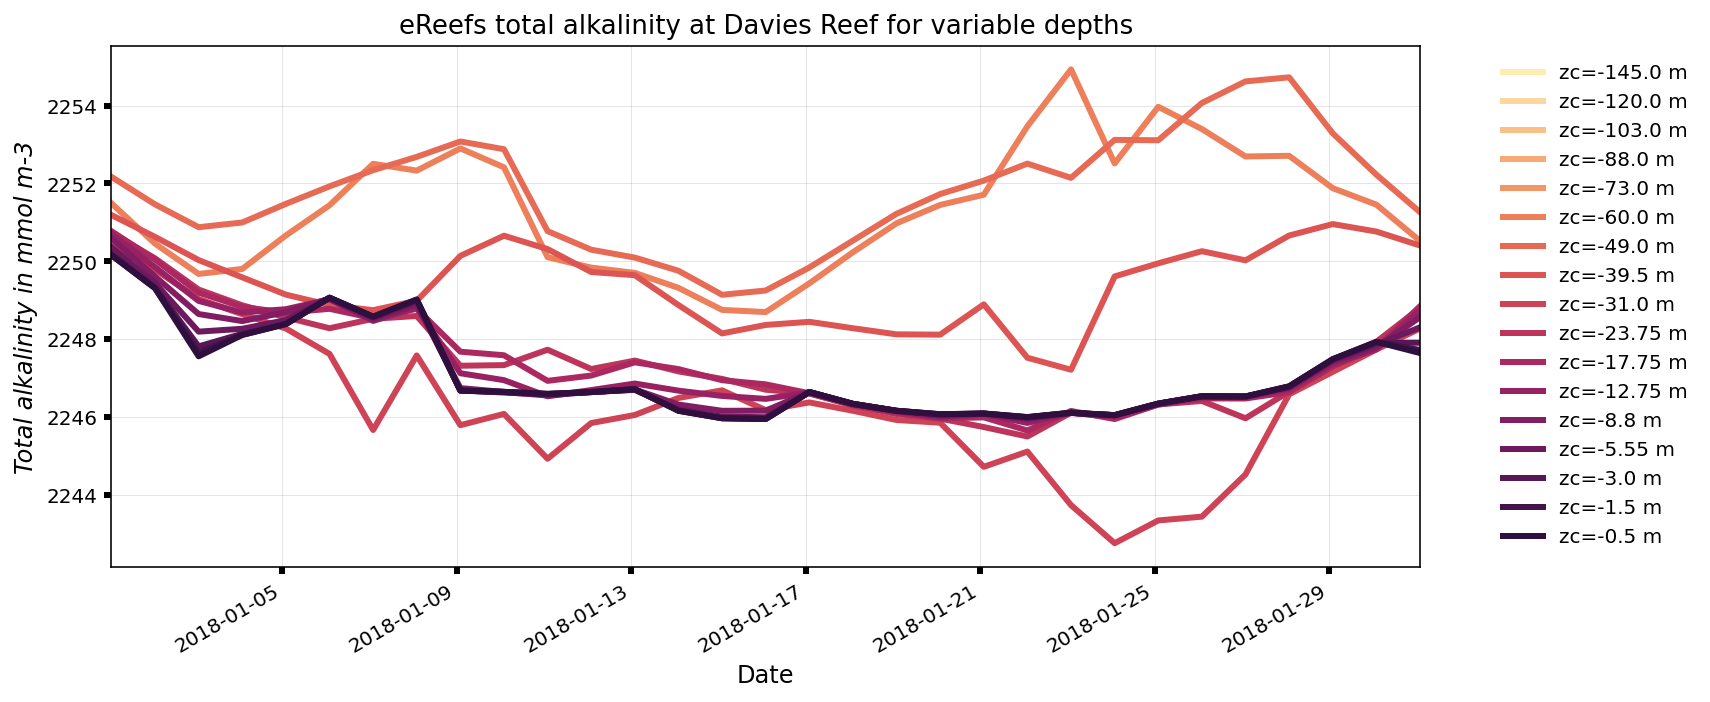

In [14]:
fig, ax = plt.subplots(figsize=(12, 5))

n = load_alk.zc.shape[0]
colors = cmocean.cm.matter(np.linspace(0,1,n))

for zc in range(n):
    load_alk.isel(k=zc).plot(ax=ax, x='time', lw=3, color=colors[zc], label='zc='+str(load_alk.zc.item(zc))+' m')

ax.legend(
    bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10, frameon=False
)

ax.set_xlim(min(load_alk.time.values),max(load_alk.time.values))
ax.set_ylabel(load_alk.long_name+' in '+load_alk.units, style="italic", fontsize=12)
ax.set_xlabel("Date", fontsize=12)

ax.grid(True, linewidth=0.5, color="k", alpha=0.1, linestyle="-")
ax.tick_params(labelcolor="k", labelsize="medium", width=3)
plt.title('eReefs total alkalinity at Davies Reef for variable depths', fontsize=13)

plt.tight_layout()

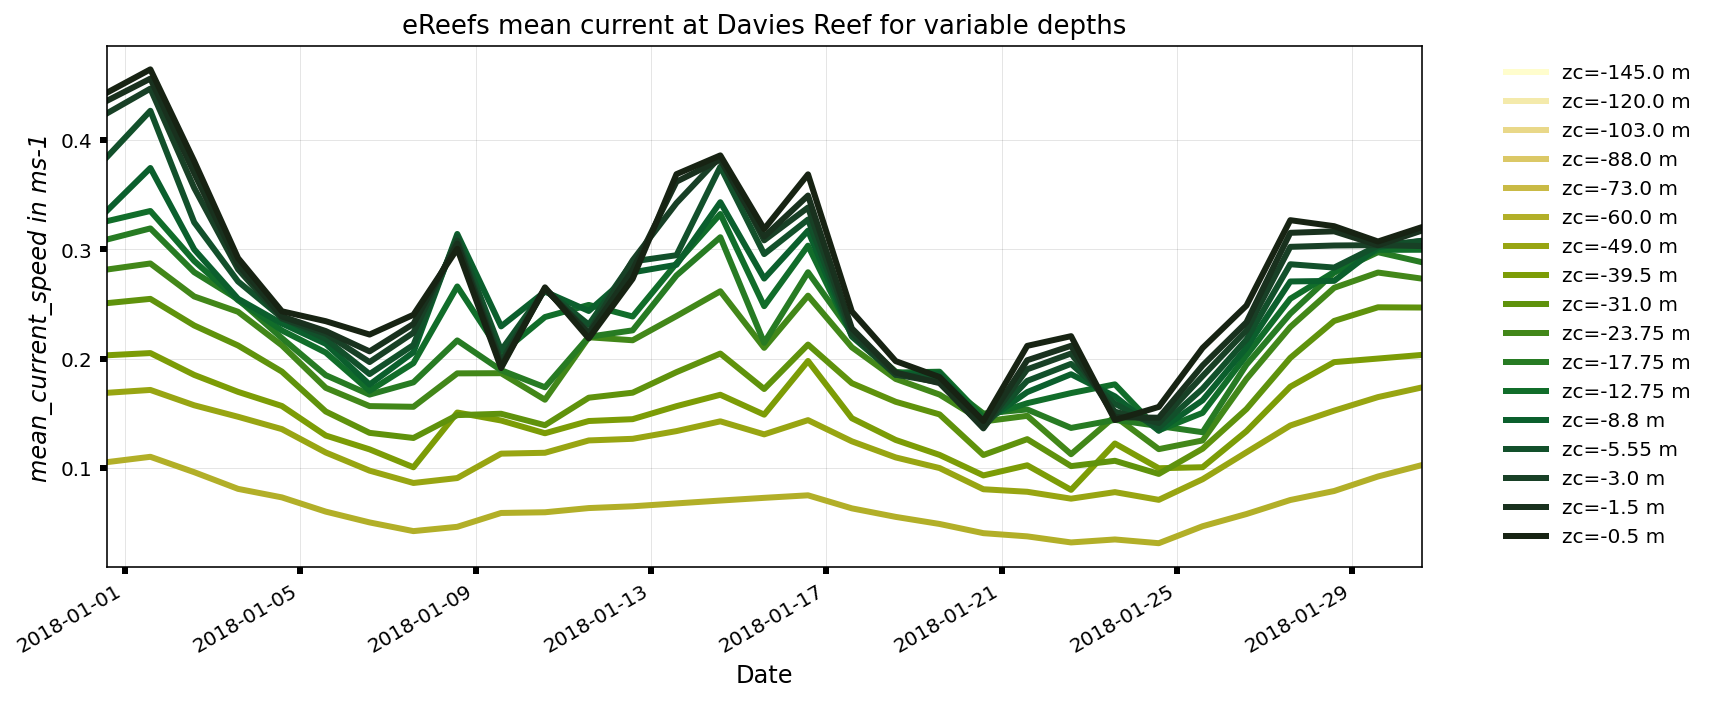

In [15]:
fig, ax = plt.subplots(figsize=(12, 5))

n = load_curr.zc.shape[0]
colors = cmocean.cm.speed(np.linspace(0,1,n))

for zc in range(n):
    load_curr.isel(k=zc).plot(ax=ax, x='time', lw=3, color=colors[zc], label='zc='+str(load_curr.zc.item(zc))+' m')

ax.legend(
    bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10, frameon=False
)

ax.set_xlim(min(load_curr.time.values),max(load_curr.time.values))
ax.set_ylabel(load_curr.long_name+' in '+load_curr.units, style="italic", fontsize=12)
ax.set_xlabel("Date", fontsize=12)

ax.grid(True, linewidth=0.5, color="k", alpha=0.1, linestyle="-")
ax.tick_params(labelcolor="k", labelsize="medium", width=3)
plt.title('eReefs mean current at Davies Reef for variable depths', fontsize=13)

plt.tight_layout()